<a href="https://colab.research.google.com/github/JakobUniver/Traffic-sign-detection-in-color-videos/blob/main/test_lenet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from google.colab.patches import cv2_imshow

In [2]:
!git clone https://github.com/JakobUniver/Traffic-sign-detection-in-color-videos.git -q

In [ ]:
!ls

README.dataset.txt   test				       valid
README.roboflow.txt  Traffi_and_Road_Signs_v1i_multiclass.zip
sample_data	     train


In [ ]:
!unzip -q ./Traffi_and_Road_Signs_v1i_multiclass.zip

In [13]:
data_df = pd.read_csv("Traffic-sign-detection-in-color-videos/data/data_lenet/lenet_data.csv", index_col=0)
data_df["Type"] = pd.Categorical(data_df["Type"])
data_df['Class'] = data_df["Type"].cat.codes
data_df.loc[data_df['Class'].drop_duplicates().index][['Type', 'Class']].to_csv('lenet_classes2.csv')

In [37]:
classes = pd.read_csv("lenet_classes2.csv", index_col=0)
classes

,Type,Class
0,regulatory--keep-right--g1,123
1,regulatory--priority-over-oncoming-vehicles--g1,227
2,other-sign,88
3,regulatory--height-limit--g1,120
4,regulatory--maximum-speed-limit-35--g2,140
...,...,...
31561,information--end-of-pedestrians-only--g2,59
40984,complementary--maximum-speed-limit-50--g1,30
45540,warning--playground--g3,330
50947,warning--roadworks--g6,357


In [33]:
num_classes = len(classes.index)
num_classes

399

In [16]:
data_df.head()

,Sign,Type,Class
0,./lenet_images/--7fWq6WjZM8L1eUSuvOEA_0.jpg,regulatory--keep-right--g1,123
1,./lenet_images/--7fWq6WjZM8L1eUSuvOEA_1.jpg,regulatory--priority-over-oncoming-vehicles--g1,227
2,./lenet_images/--7fWq6WjZM8L1eUSuvOEA_2.jpg,other-sign,88
3,./lenet_images/--7fWq6WjZM8L1eUSuvOEA_3.jpg,regulatory--height-limit--g1,120
4,./lenet_images/--A4b2SOWVi4KL_ryAAtTg_0.jpg,regulatory--maximum-speed-limit-35--g2,140


In [72]:
filter_out = data_df[data_df['Class'] == 88][500:].index
data_df = data_df[~data_df.index.isin(filter_out)]
data_df

,Sign,Type,Class
0,./lenet_images/--7fWq6WjZM8L1eUSuvOEA_0.jpg,regulatory--keep-right--g1,123
1,./lenet_images/--7fWq6WjZM8L1eUSuvOEA_1.jpg,regulatory--priority-over-oncoming-vehicles--g1,227
3,./lenet_images/--7fWq6WjZM8L1eUSuvOEA_3.jpg,regulatory--height-limit--g1,120
4,./lenet_images/--A4b2SOWVi4KL_ryAAtTg_0.jpg,regulatory--maximum-speed-limit-35--g2,140
13,./lenet_images/--L1OMr84-e5nOLbNH5sBA_0.jpg,warning--railroad-crossing-with-barriers--g1,334
...,...,...,...
59540,./lenet_images/KA9KbiQuumTN223d7MYYOA_0.jpg,regulatory--priority-road--g4,228
59546,./lenet_images/KAamiWzaECoFN2HV_AZ5UA_0.jpg,regulatory--no-left-turn--g1,171
59547,./lenet_images/KALPFJEk2_1VcaWfZ6Wg3A_0.jpg,warning--curve-right--g2,278
59556,./lenet_images/KB1TSyX4C9-cF5DXNKQdMQ_0.jpg,warning--junction-with-a-side-road-perpendicul...,310


In [73]:
imgs = data_df.apply(lambda row: cv2.imread('Traffic-sign-detection-in-color-videos/data/data_lenet'+row['Sign'][1:]), axis=1)

In [ ]:
#new_shape = (64,64)
#imgs = imgs_org.apply((lambda img: cv2.resize(img, new_shape, interpolation=cv2.INTER_AREA)))
#imgs = imgs.apply((lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)))

In [74]:
imgs = np.array(list(imgs))

In [77]:
data_df['Class'].value_counts()

263    827
79     685
164    603
8      531
88     500
      ... 
59       2
106      2
64       2
357      2
100      1
Name: Class, Length: 399, dtype: int64

In [78]:
label = data_df['Class'].to_numpy()
label.shape


(20925,)

filename                                00033_00002_00001_png_jpg.rf.b974e1342a26f2404...
 -Road narrows on right                                                                 0
 50 mph speed limit                                                                     0
 Attention Please-                                                                      0
 Beware of children                                                                     0
 CYCLE ROUTE AHEAD WARNING                                                              0
 Dangerous Left Curve Ahead                                                             0
 Dangerous Rright Curve Ahead                                                           0
 End of all speed and passing limits                                                    0
 Give Way                                                                               0
 Go Straight or Turn Right                                                              0
 Go straig

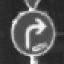

In [ ]:
id = 7000
print(data_df.iloc[id])
cv2_imshow(imgs[id])

In [ ]:
#mu = imgs.mean(axis=(0)) # finds mean of R, G and B separately
#std = imgs.std(axis=(0)) # same for std
#X_norm = (imgs - mu)/std
#print(mu, std)

In [ ]:
#X_norm.shape

In [30]:
img_shape = imgs[0].shape
img_shape

(64, 64, 3)

In [ ]:
#y = data_df.apply(lambda row: [np.where(row.values[1:num_classes+1] == 1)[0][0]], axis=1)
#y = data_df.apply(lambda row: np.where(row.values[1:num_classes+1] == 1)[0][0], axis=1)
y = data_df.apply(lambda row: row.values[1:num_classes+1], axis=1)
#y = np.array(list(y),dtype=bool)

In [ ]:
y[id]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0], dtype=object)

In [ ]:
y_label = np.array(list([[l.argmax()]for l in y]))
y_label.shape

(7092, 1)

In [79]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout,Normalization

In [80]:
normalizer = Normalization()
normalizer.adapt(imgs)

In [81]:
x = Input(shape=(img_shape[0],img_shape[1],3 if len(img_shape) == 3 else 1))
n = normalizer(x)
c1 = Conv2D(60, (5, 5), strides=(1, 1), padding="same")(n)
b1 = BatchNormalization()(c1)
a1 = Activation('tanh')(b1)

c2 = Conv2D(60, (5, 5), strides=(1, 1), padding="valid")(a1)
b2 = BatchNormalization()(c2)
a2 = Activation('tanh')(b2)

p3 = MaxPooling2D(pool_size=2)(a2)

c4 = Conv2D(30, (5, 5), strides=(1, 1), padding="valid")(p3)
b4 = BatchNormalization()(c4)
a4 = Activation('tanh')(b4)

c5 = Conv2D(30, (5, 5), strides=(1, 1), padding="same")(a4)
b5 = BatchNormalization()(c5)
a5 = Activation('tanh')(b5)

p6 = MaxPooling2D(pool_size=2, padding="same")(a5)
d6 = Dropout(rate=0.5)(p6)
f6 = Flatten()(d6)

h7 = Dense(500)(f6)
b7 = BatchNormalization()(h7)
a7 = Activation('tanh')(b7)


h8 = Dense(500)(a7)
b8 = BatchNormalization()(h8)
a8 = Activation('softmax')(b8)
d8 = Dropout(rate=0.5)(a8)

z = Dense(num_classes)(d8)
p = Activation('softmax')(z)
model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
#model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [82]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 normalization_1 (Normalizat  (None, 64, 64, 3)        7         
 ion)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 60)        4560      
                                                                 
 batch_normalization_12 (Bat  (None, 64, 64, 60)       240       
 chNormalization)                                                
                                                                 
 activation_13 (Activation)  (None, 64, 64, 60)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 60)        9006

In [88]:
history = model.fit(imgs,label, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
262/262 [==============================] - 11s 42ms/step - loss: 1.1222 - accuracy: 0.7550 - val_loss: 0.8877 - val_accuracy: 0.8196
Epoch 2/50
262/262 [==============================] - 11s 42ms/step - loss: 1.1006 - accuracy: 0.7602 - val_loss: 0.8768 - val_accuracy: 0.8215
Epoch 3/50
262/262 [==============================] - 11s 42ms/step - loss: 1.1015 - accuracy: 0.7585 - val_loss: 0.8817 - val_accuracy: 0.8232
Epoch 4/50
262/262 [==============================] - 11s 42ms/step - loss: 1.0954 - accuracy: 0.7590 - val_loss: 0.8611 - val_accuracy: 0.8263
Epoch 5/50
262/262 [==============================] - 11s 42ms/step - loss: 1.0884 - accuracy: 0.7600 - val_loss: 0.8777 - val_accuracy: 0.8172
Epoch 6/50
262/262 [==============================] - 11s 42ms/step - loss: 1.0836 - accuracy: 0.7630 - val_loss: 0.8724 - val_accuracy: 0.8208
Epoch 7/50
262/262 [==============================] - 11s 42ms/step - loss: 1.0861 - accuracy: 0.7616 - val_loss: 0.8798 - val_accuracy:

Text(0.5, 1.0, 'Accuracy')

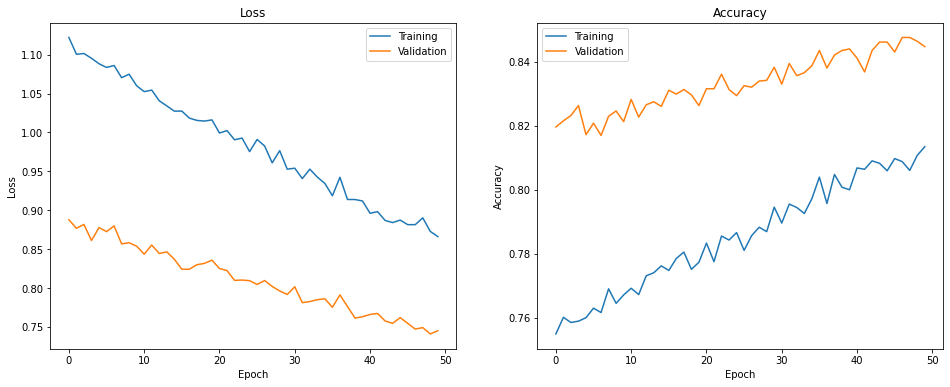

In [89]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')

shape (64, 64, 3)
expected class: 189


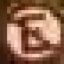

In [90]:
id = 100
print('shape',imgs[id].shape)
#print(data_df.iloc[id])
expected_class = data_df.iloc[id]['Class']
print('expected class:',expected_class)
cv2_imshow(imgs[id])

In [91]:
model.predict(np.array([imgs[id]])).argmax()

1/1 [==============================] - 0s 139ms/step


189

In [92]:
model.save('lenet_model3')

In [93]:
!zip -r /content/lenet_model3.zip /content/lenet_model3

  adding: content/lenet_model3/ (stored 0%)
  adding: content/lenet_model3/assets/ (stored 0%)
  adding: content/lenet_model3/saved_model.pb (deflated 90%)
  adding: content/lenet_model3/keras_metadata.pb (deflated 93%)
  adding: content/lenet_model3/variables/ (stored 0%)
  adding: content/lenet_model3/variables/variables.index (deflated 73%)
  adding: content/lenet_model3/variables/variables.data-00000-of-00001 (deflated 9%)


In [ ]:
!zip -r lenet_model.zip lenet_model

  adding: lenet_model/ (stored 0%)
  adding: lenet_model/assets/ (stored 0%)
  adding: lenet_model/variables/ (stored 0%)
  adding: lenet_model/variables/variables.index (deflated 73%)
  adding: lenet_model/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: lenet_model/keras_metadata.pb (deflated 93%)
  adding: lenet_model/saved_model.pb (deflated 89%)


In [ ]:
keras.models.load_model("lenet_model")
model.predict(np.array([imgs[id]])).argmax()

1/1 [==============================] - 0s 16ms/step


27

In [ ]:
# test model
!ls -l lenet_model.zip

-rw-r--r-- 1 root root 33625732 Nov 25 19:26 lenet_model.zip
